In [242]:
!pip -q install plotly 
!pip -q install yellowbrick
!pip -q install pandas
!pip -q install matplotlib
!pip -q install seaborn

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [244]:
base_carros = pd.read_csv('cars.csv')

In [245]:
base_carros

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [246]:
base_carros = base_carros[['Brand','Model','Year','Kilometers_Driven','Owner_Type','Seats','Price']]
base_carros
#Reduzindo base de dados para ter somente os dados relevantes.

,Brand,Model,Year,Kilometers_Driven,Owner_Type,Seats,Price
0,Toyota,Corolla,2018,50000,First,5,800000
1,Honda,Civic,2019,40000,Second,5,1000000
2,Ford,Mustang,2017,20000,First,4,2500000
3,Maruti,Swift,2020,30000,Third,5,600000
4,Hyundai,Sonata,2016,60000,Second,5,850000
...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,First,5,2900000
96,Toyota,Innova Crysta,2017,38000,Second,7,1400000
97,Ford,EcoSport,2018,26000,Third,5,750000
98,Hyundai,Verna,2019,24000,Second,5,850000


Decidi transformar o valor do preço dos carros de Rúpias Indianas para Reais Brasileiros, para trabalhar com medidas que possuo melhor noção quantitativa.

In [247]:

base_carros['Price'] = np.multiply(base_carros['Price'] , 0.062)


C:\Users\ferna\AppData\Local\Temp\ipykernel_7520\2122226254.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [248]:
base_carros

,Brand,Model,Year,Kilometers_Driven,Owner_Type,Seats,Price
0,Toyota,Corolla,2018,50000,First,5,49600.0
1,Honda,Civic,2019,40000,Second,5,62000.0
2,Ford,Mustang,2017,20000,First,4,155000.0
3,Maruti,Swift,2020,30000,Third,5,37200.0
4,Hyundai,Sonata,2016,60000,Second,5,52700.0
...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,First,5,179800.0
96,Toyota,Innova Crysta,2017,38000,Second,7,86800.0
97,Ford,EcoSport,2018,26000,Third,5,46500.0
98,Hyundai,Verna,2019,24000,Second,5,52700.0


In [249]:
base_carros.describe()

,Year,Kilometers_Driven,Seats,Price
count,100.00000,100.000000,100.000000,100.00000
mean,2018.39000,28150.000000,5.230000,97588.00000
std,1.17116,9121.375716,0.750151,62016.40591
min,2016.00000,10000.000000,4.000000,27900.00000
25%,2017.75000,22000.000000,5.000000,43400.00000
50%,2018.00000,27000.000000,5.000000,80600.00000
75%,2019.00000,32000.000000,5.000000,155000.00000
max,2021.00000,60000.000000,7.000000,248000.00000


Importante perceber que a nossa base de dados não é grande, vamos perceber como isso afeta nossos algoritmos de classificação mais a frente.

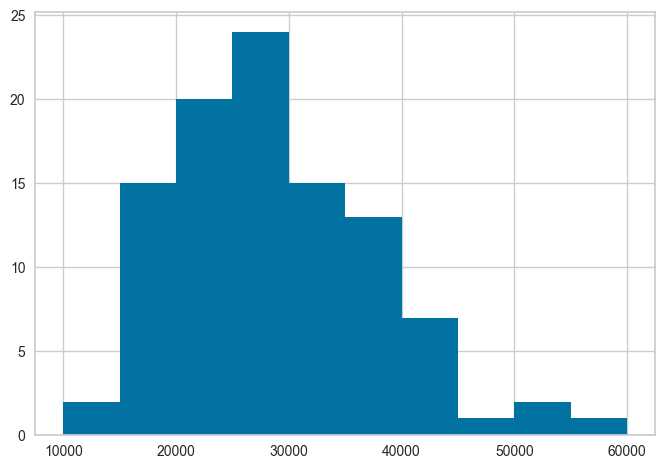

In [250]:
plt.hist(x = base_carros['Kilometers_Driven']);
#Descobrindo o formato geral dos dados de kilometragem dos nossos carros usados.

In [251]:
grafico = px.scatter_matrix(base_carros, dimensions=['Brand', 'Price', 'Kilometers_Driven'], color = 'Price')
grafico.show()

Neste último gráfico conseguimos informações relevantes do nossos dados, entre elas:
    - O gráfico de marca por preço, mostrando a influencia direta entre esses dois > marcas de luxo são mais claras no mapeamento de calor do preço;
    - O gráfico de marca por kilometragem > marcas de luxo normalmente tem kilometragem mais baixa, o que ajuda a preservar seu valor de revenda e exibe o estilo de vida dos donos em relação a aquele carro.
                Além disso, carros mais baratos tendem a ter uma maior kilometragem, pois servem mais como uma ferramenta e não tem o aspecto de mostrar status social como os de luxo, além de ser menos alvejados por criminosos. 

Assim chegamos a conclusões socio-econômicas interessantes desses dados que vem da índia, que é um país em desenvolvimento parecido com o Brasil nestes aspectos citados acima.

In [252]:
grafico = px.treemap(base_carros, path=['Brand','Owner_Type','Model','Price'])
grafico.show()

Aqui vemos uma relação proporcional entre a desvalorização e a quantidade de revendas, com pequenas situações que podem fugir deste cenário por conta do modelo do veículo, que já é mais caro a priori.

In [253]:
base_carros

,Brand,Model,Year,Kilometers_Driven,Owner_Type,Seats,Price
0,Toyota,Corolla,2018,50000,First,5,49600.0
1,Honda,Civic,2019,40000,Second,5,62000.0
2,Ford,Mustang,2017,20000,First,4,155000.0
3,Maruti,Swift,2020,30000,Third,5,37200.0
4,Hyundai,Sonata,2016,60000,Second,5,52700.0
...,...,...,...,...,...,...,...
95,Mercedes,C-Class,2019,22000,First,5,179800.0
96,Toyota,Innova Crysta,2017,38000,Second,7,86800.0
97,Ford,EcoSport,2018,26000,Third,5,46500.0
98,Hyundai,Verna,2019,24000,Second,5,52700.0


In [254]:
#Previsores
X_carros = base_carros.iloc[:,1:7].values
X_carros

array([['Corolla', 2018, 50000, 'First', 5, 49600.0],
       ['Civic', 2019, 40000, 'Second', 5, 62000.0],
       ['Mustang', 2017, 20000, 'First', 4, 155000.0],
       ['Swift', 2020, 30000, 'Third', 5, 37200.0],
       ['Sonata', 2016, 60000, 'Second', 5, 52700.0],
       ['Nexon', 2019, 35000, 'First', 5, 46500.0],
       ['Scorpio', 2018, 45000, 'Second', 7, 55800.0],
       ['Polo', 2020, 25000, 'First', 5, 40300.0],
       ['A4', 2017, 30000, 'First', 5, 136400.0],
       ['X1', 2019, 20000, 'Second', 5, 167400.0],
       ['C-Class', 2018, 28000, 'First', 5, 142600.0],
       ['Endeavour', 2017, 35000, 'Second', 7, 124000.0],
       ['Creta', 2019, 22000, 'Third', 5, 52700.0],
       ['Harrier', 2018, 40000, 'First', 5, 99200.0],
       ['Ertiga', 2020, 18000, 'First', 7, 52700.0],
       ['City', 2017, 42000, 'Second', 5, 40300.0],
       ['Tiguan', 2018, 32000, 'First', 5, 111600.0],
       ['Q3', 2016, 38000, 'Second', 5, 117800.0],
       ['5 Series', 2019, 24000, 'First', 5,

In [255]:
#Classificadores
Y_carros = base_carros.iloc[:,0].values
Y_carros

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes', 'Ford', 'Hyundai', 'Tata',
       'Maruti', 'Honda', 'Volkswagen', 'Audi', 'BMW', 'Mercedes',
       'Toyota', 'Ford', 'Hyundai', 'Tata', 'Mahindra', 'Volkswagen',
       'Audi', 'BMW', 'Mercedes', 'Toyota', 'Ford', 'Hyundai', 'Tata',
       'Maruti', 'Honda', 'Volkswagen', 'Audi', 'BMW', 'Mercedes',
       'Toyota', 'Ford', 'Hyundai', 'Tata', 'Maruti', 'Honda',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'Ford',
       'Hyundai', 'Tata', 'Mahindra', 'Volkswagen', 'Audi', 'BMW',
       'Mercedes', 'Toyota', 'Ford', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'Ford',
       'Hyundai', 'Tata', 'Maruti', 'Honda', 'Volkswagen', 'Audi', 'BMW',
       'Mercedes', 'Toyota', 'Ford', 'Hyundai', 'Tata', 'Maruti', 'Honda',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes', 'Toyota', 'Ford',
       'Hyundai', 'Tata', 'Mah

//Encodificar atributos categóricos (Strings principalmente)

In [256]:
from sklearn.preprocessing import LabelEncoder

In [257]:
label_encoder_model = LabelEncoder()

In [258]:
X_carros[:,0]

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Mustang', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5',
       '3 Series', 'C-Class', 'Innova Crysta', 'EcoSport', 'Verna',
       'Altroz', 'Thar', 'Passat', 'A6', 'X3', 'E-Class', 'Fortuner',
       'Aspire', 'Elantra', 'Safari', 'Vitara', 'WR-V', 'Ameo', 'A3',
       '7 Series', 'GLE', 'Yaris', 'Ranger', 'Santro', 'Tigor', 'S-Cross',
       'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA', 'Camry', 'Mustang', 'Venue',
       'Tiago', 'XUV300', 'Vento', 'A5', '3 Series', 'C-Class',
       'Innova Cry

In [259]:
X_carros[:,0] = label_encoder_model.fit_transform(X_carros[:,0])

In [260]:
X_carros[:,0]

array([15, 14, 30, 42, 41, 31, 40, 33, 4, 53, 11, 20, 16, 27, 21, 13, 47,
       34, 1, 25, 28, 22, 50, 7, 44, 32, 6, 54, 17, 23, 9, 19, 38, 51, 52,
       8, 3, 2, 26, 57, 36, 39, 46, 37, 10, 43, 35, 55, 24, 12, 30, 49,
       45, 56, 48, 5, 0, 11, 29, 18, 50, 7, 44, 32, 6, 54, 17, 23, 9, 19,
       38, 51, 52, 8, 3, 2, 26, 57, 36, 39, 46, 37, 10, 43, 35, 55, 24,
       12, 30, 49, 45, 56, 48, 5, 0, 11, 29, 18, 50, 7], dtype=object)

Usando essa tática pra cada atributo categórico de tipon string...

In [261]:

label_encoder_owner = LabelEncoder()

In [262]:
X_carros[:,3] = label_encoder_owner.fit_transform(X_carros[:,3])

In [263]:
X_carros[:,3]

array([0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2,
       1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1,
       0, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0], dtype=object)

In [264]:
X_carros

array([[15, 2018, 50000, 0, 5, 49600.0],
       [14, 2019, 40000, 1, 5, 62000.0],
       [30, 2017, 20000, 0, 4, 155000.0],
       [42, 2020, 30000, 2, 5, 37200.0],
       [41, 2016, 60000, 1, 5, 52700.0],
       [31, 2019, 35000, 0, 5, 46500.0],
       [40, 2018, 45000, 1, 7, 55800.0],
       [33, 2020, 25000, 0, 5, 40300.0],
       [4, 2017, 30000, 0, 5, 136400.0],
       [53, 2019, 20000, 1, 5, 167400.0],
       [11, 2018, 28000, 0, 5, 142600.0],
       [20, 2017, 35000, 1, 7, 124000.0],
       [16, 2019, 22000, 2, 5, 52700.0],
       [27, 2018, 40000, 0, 5, 99200.0],
       [21, 2020, 18000, 0, 7, 52700.0],
       [13, 2017, 42000, 1, 5, 40300.0],
       [47, 2018, 32000, 0, 5, 111600.0],
       [34, 2016, 38000, 1, 5, 117800.0],
       [1, 2019, 24000, 0, 5, 186000.0],
       [25, 2017, 26000, 1, 5, 155000.0],
       [28, 2018, 50000, 0, 7, 86800.0],
       [22, 2020, 15000, 2, 5, 34100.0],
       [50, 2019, 26000, 1, 5, 52700.0],
       [7, 2020, 18000, 0, 5, 37200.0],
       [44

Agora que todos os dados estão em formato numérico, usaremos o one hot encoder para retirar o 'peso' das categorias numeradas.

In [265]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [266]:
onehotencoder_carros = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,3])], remainder='passthrough')

In [267]:
X_carros = onehotencoder_carros.fit_transform(X_carros).toarray()

In [268]:
X_carros

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 5.00e+04, 5.00e+00, 4.96e+04],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 4.00e+04, 5.00e+00, 6.20e+04],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.00e+04, 4.00e+00, 1.55e+05],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.60e+04, 5.00e+00, 4.65e+04],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.40e+04, 5.00e+00, 5.27e+04],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.80e+04, 5.00e+00, 3.72e+04]])

In [269]:
X_carros[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 2.018e+03, 5.000e+04, 5.000e+00, 4.960e+04])

In [270]:
X_carros.shape

(100, 65)

//Escalonamento dos valores

In [271]:
from sklearn.preprocessing import StandardScaler
scaler_carros = StandardScaler()
X_carros = scaler_carros.fit_transform(X_carros)

In [272]:
X_carros

array([[-0.14285714, -0.10050378, -0.14285714, ...,  2.40753993,
        -0.30814935, -0.77769348],
       [-0.14285714, -0.10050378, -0.14285714, ...,  1.30569099,
        -0.30814935, -0.57673909],
       [-0.14285714, -0.10050378, -0.14285714, ..., -0.89800689,
        -1.64792914,  0.93041882],
       ...,
       [-0.14285714, -0.10050378, -0.14285714, ..., -0.23689752,
        -0.30814935, -0.82793208],
       [-0.14285714, -0.10050378, -0.14285714, ..., -0.45726731,
        -0.30814935, -0.72745489],
       [-0.14285714, -0.10050378, -0.14285714, ..., -1.11837667,
        -0.30814935, -0.97864787]])

In [273]:
X_carros[0]#model

array([-0.14285714, -0.10050378, -0.14285714, -0.14285714, -0.10050378,
       -0.14285714, -0.14285714, -0.17586311, -0.14285714, -0.14285714,
       -0.14285714, -0.17586311, -0.14285714, -0.10050378, -0.10050378,
        9.94987437, -0.10050378, -0.14285714, -0.14285714, -0.14285714,
       -0.10050378, -0.10050378, -0.10050378, -0.14285714, -0.14285714,
       -0.10050378, -0.14285714, -0.10050378, -0.10050378, -0.14285714,
       -0.17586311, -0.10050378, -0.14285714, -0.10050378, -0.10050378,
       -0.14285714, -0.14285714, -0.14285714, -0.14285714, -0.14285714,
       -0.10050378, -0.10050378, -0.10050378, -0.14285714, -0.14285714,
       -0.14285714, -0.14285714, -0.10050378, -0.14285714, -0.14285714,
       -0.17586311, -0.14285714, -0.14285714, -0.10050378, -0.14285714,
       -0.14285714, -0.14285714, -0.14285714,  1.12815215, -0.86855395,
       -0.38655567, -0.33468073,  2.40753993, -0.30814935, -0.77769348])

//Divisão de base treino e base teste

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
X_carros_treinamento, X_carros_teste, Y_carros_treinamento, Y_carros_teste = train_test_split(X_carros,Y_carros,test_size = 0.25, random_state = 0)

In [276]:
X_carros_treinamento.shape

(75, 65)

In [277]:
Y_carros_treinamento.shape

(75,)

In [278]:
X_carros_teste.shape, Y_carros_teste.shape

((25, 65), (25,))

//Salvar variáveis com pickle

In [279]:
import pickle

In [280]:
with open('carros.pkl',mode= 'wb') as f:
    pickle.dump([X_carros_treinamento,Y_carros_treinamento,X_carros_teste,Y_carros_teste],f)

//NAIVE BAYES

In [281]:
from sklearn.naive_bayes import GaussianNB

In [282]:
naive_carros = GaussianNB()
naive_carros.fit(X_carros_treinamento,Y_carros_treinamento)

GaussianNB()

Lembrando as colunas da tabela X_carros:<br>
    0,       1,       2,                   3,            4,      5 e       6<br>
Brand -	Model - Year - Kilometers_Driven - Owner_Type - Seats - Price

In [283]:
previsoes = naive_carros.predict(X_carros_teste)
previsoes

array(['Audi', 'Mercedes', 'Ford', 'Mercedes', 'BMW', 'Mercedes', 'Tata',
       'Volkswagen', 'Mahindra', 'Mercedes', 'Mahindra', 'Mahindra',
       'Ford', 'Tata', 'Maruti', 'Ford', 'Hyundai', 'Tata', 'Mahindra',
       'Audi', 'Maruti', 'Tata', 'Volkswagen', 'Mahindra', 'Volkswagen'],
      dtype='<U10')

//Comparação com as respostas reais (Y_Carros_teste)

In [284]:
Y_carros_teste

array(['Audi', 'Mercedes', 'Ford', 'Audi', 'BMW', 'Audi', 'Volkswagen',
       'Volkswagen', 'Volkswagen', 'Mercedes', 'Mahindra', 'Volkswagen',
       'Ford', 'Tata', 'Volkswagen', 'Ford', 'Hyundai', 'Mahindra',
       'Maruti', 'Audi', 'Maruti', 'Mahindra', 'Maruti', 'Maruti',
       'Volkswagen'], dtype=object)

In [285]:
from sklearn.metrics import accuracy_score


In [286]:
accuracy_score(Y_carros_teste,previsoes)#não executando escalonamento para naive bayes costuma dar melhores resultados. Como faremos mais algoritmos não é nosso caso.

0.56

In [287]:
from yellowbrick.classifier import ConfusionMatrix,classification_report

0.56

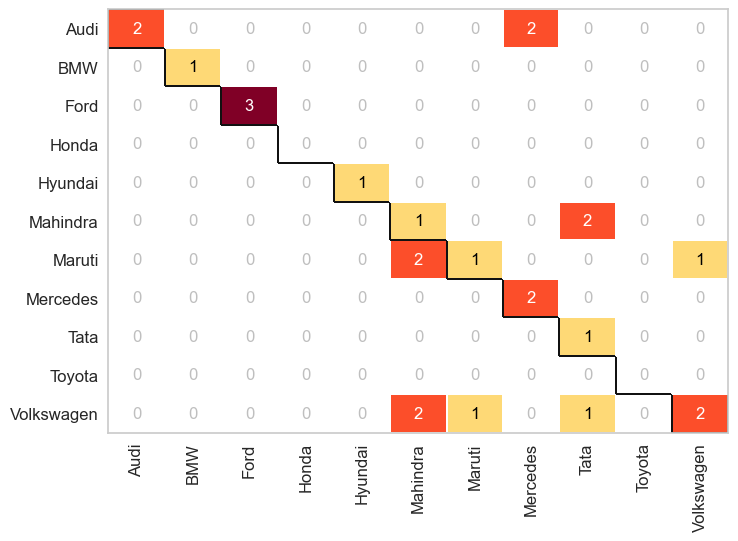

In [288]:
cm = ConfusionMatrix(naive_carros)
cm.fit(X_carros_treinamento,Y_carros_treinamento)
cm.score(X_carros_teste,Y_carros_teste)